In [1]:
# ipython settings
%load_ext autoreload
%autoreload 2
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error # we are going to assess the quality of the model based on the generalization MSE
from sklearn.metrics import accuracy_score
from sympy import init_printing # We use sympy to display mathematical expresssions 
import numpy as np # we use numpy to deal with arrays
import lime 
import lime.lime_tabular
init_printing()

In [3]:
def f(X):
    X = np.array(X)
    Y = np.zeros((X.shape[0], 2))
    radius = 0.4**2
    margin = 0.01
    center = (0.5, 0.5)
        
    Y[(X[:, 0] - center[0]) **2 + (X[:, 1] - center[1]) **2 <= radius - margin, 0] = 1.
    Y[(X[:, 0] - center[0]) **2 + (X[:, 1] - center[1]) **2 <= radius - margin, 1] = 0.
    
    Y[(radius - margin < (X[:, 0] - center[0]) **2 + (X[:, 1] - center[1]) **2) *\
          ((X[:, 0] - center[0]) **2 + (X[:, 1] - center[1]) **2 <= radius), 0] = 1.
    Y[(radius - margin < (X[:, 0] - center[0]) **2 + (X[:, 1] - center[1]) **2) *\
          ((X[:, 0] - center[0]) **2 + (X[:, 1] - center[1]) **2 <= radius), 1] = 0.
    

    Y[(radius < (X[:, 0] - center[0])**2 + (X[:, 1] - center[1])**2) *\
          ((X[:, 0] - center[0])**2 + (X[:, 1] - center[1])**2 <= radius + margin), 0] = 0.
    Y[(radius < (X[:, 0] - center[0])**2 + (X[:, 1] - center[1])**2) *\
          ((X[:, 0] - center[0])**2 + (X[:, 1] - center[1])**2 <= radius + margin), 1] = 1.
    
    Y[(X[:, 0] - center[0])**2 + (X[:, 1] - center[1])**2 > (radius + margin), 0] = 0.
    Y[(X[:, 0] - center[0])**2 + (X[:, 1] - center[1])**2 > (radius + margin), 1] = 1.
    
    return Y

dim_X = 2

In [4]:
n_pts = 100
X = np.random.uniform(0, 1, (n_pts, dim_X))

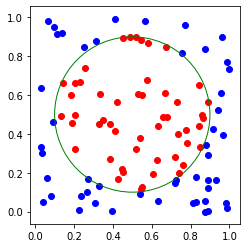

In [5]:
import matplotlib.pyplot as plt
y = f(X)
figure, ax = plt.subplots()
ax.set_aspect(1)
circle = plt.Circle((0.5, 0.5), 0.4, color='g', fill=False)
ax.add_artist(circle)
ax.scatter(X[:, 0][y[:, 0] > 0.75], X[:, 1][y[:, 0] > 0.75], c='r')
ax.scatter(X[:, 0][y[:, 1] > 0.75], X[:, 1][y[:, 1] > 0.75], c='b')

plt.savefig("syndata.png")
plt.show()


In [6]:
n_test = 100
X_test = np.random.uniform(0, 1, (n_test, dim_X))

<Figure size 432x288 with 0 Axes>

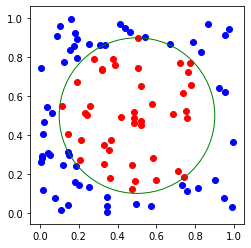

In [7]:
import matplotlib.pyplot as plt
y_ = f(X_test)
plt.clf()
figure, ax = plt.subplots()
ax.set_aspect(1)
circle = plt.Circle((0.5, 0.5), 0.4, color='g', fill=False)
ax.add_artist(circle)
ax.scatter(X_test[:, 0][y_[:, 0] > 0.75], X_test[:, 1][y_[:, 0] > 0.75], c='r')
ax.scatter(X_test[:, 0][y_[:, 1] > 0.75], X_test[:, 1][y_[:, 1] > 0.75], c='b')
plt.show()

In [8]:
from symbolic_pursuit.classification import SymbolicClassifier  # our symbolic model class

symbolic_model = SymbolicClassifier(verbosity=True,
                                    maxiter=100,
                                    nclasses=2,
                                   loss_tol = 0.01)
symbolic_model.fit(f, X, nmax=10, batch_size=20)

Model created with the following hyperparameters :
 loss_tol=0.01 
 ratio_tol=0.9 
 maxiter=100 
 eps=0.001 
 random_seed=42
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Now working on term number  1 .
Worker Index: 0; Now working on hyperparameter tree: (array([0.5, 0. ]), [1, 0, 0, 2]).
Optimization terminated successfully.
         Current function value: 0.349716
         Iterations: 1
         Function evaluations: 24
         Gradient evaluations: 2
Worker Index: 0; Current loss: 0.3497161620625882.
Worker Index: 1; Now working on hyperparameter tree: (array([2., 2., 2., 1.]), [0, 1, 3, 1]).
Optimization terminated successfully.
         Current function value: 0.349426
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 1
Worker Index: 1; Current loss: 0.34942571503798775.
Worker Index: 2; Now working on hyperparameter tree: (array([0.3, 0.1, 0.1, 0. , 0.3]), [2, 1, 2, 3]).
         Curre

In [9]:
symbolic_weight_list = [] 
for k in range(n_test):
    symbolic_weight_list.append(symbolic_model.get_feature_importance(X_test[k]))

In [10]:
print (symbolic_weight_list)

[[-0.0877248186885018, -0.207635076765816], [-0.0646130713590609, -0.153288150510615], [-0.0866491898913964, -0.205105751826382], [-0.0613088684922944, -0.145518367163095], [-0.101717387056880, -0.240538390842308], [-0.0640563251108312, -0.151978970081109], [-0.0880220052615317, -0.208333906522747], [-0.0807537893706287, -0.191242806165891], [-0.0705253471756030, -0.167190778175323], [-0.130923467005501, -0.309216048595569], [-0.0998696528380298, -0.236193471615748], [-0.102678996156398, -0.242799600177667], [-0.0919880190873448, -0.217659928387135], [-0.0672322375676767, -0.159447080459128], [-0.0685902848294425, -0.162640508170768], [-0.0647114829888416, -0.153519563977979], [-0.0742149441199664, -0.175866809900164], [-0.0705585507297405, -0.167268855833511], [-0.0711751920131704, -0.168718878537497], [-0.0945382544172990, -0.223656768411164], [-0.0998641663309501, -0.236180570176865], [-0.113833940895126, -0.269030284965583], [-0.112091801893658, -0.264933671304593], [-0.07516639365

In [11]:
relative_wts = np.array(symbolic_weight_list)[np.argmax(f(X_test), 1) == 0]
relative_wts /= relative_wts[:, 0][..., None]
print (np.mean(relative_wts[:, 1]), np.var(relative_wts[:, 1]))

2.36728778090256 5.61527886753161e-6


In [12]:
poly1 = symbolic_model.get_taylor(X_test[0], approx_order=2)
poly2 = symbolic_model.get_taylor(X_test[3], approx_order=2)

print(poly1)
print(poly2)

-0.0887248186885018*X0 - 0.208635076765816*X1 + 0.067880524508067*(0.425263191903688*X0 + X1 - 0.672707226224136)**2 + 0.460976862637062
-0.0623088684922944*X0 - 0.146518367163095*X1 + 0.0704721914714422*(0.349763006069912*X0 + 0.822462448499717*X1 - 1)**2 + 0.403312690662909


In [13]:
symbolic_model.terms_list[-1]

[[<pysymbolic.models.special_functions.MeijerG at 0x7f0b673f4290>,
 array([ 0.64768854,  1.52302986, -0.23415337, -0.23413696]),
 array([ 0.49671415, -0.1382643 ])]

In [14]:
accuracy_score(np.argmax(symbolic_model.predict(X), 1), np.argmax(f(X), 1))

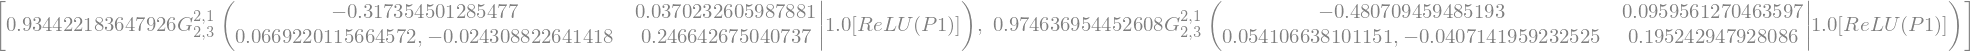

In [18]:
symbolic_model.get_expression()

In [ ]:
def order_weights(exp_list):
    ordered_weights = [0 for _ in range(dim_X)]
    for tup in exp_list:
        feature_id = int(tup[0].split('x_')[1][0])
        ordered_weights[feature_id-1] = tup[1]    
    return ordered_weights   

In [ ]:
lime_weight_list = []
explainer = lime.lime_tabular.LimeTabularExplainer(X, 
                                                   feature_names=["x_"+str(k) for k in range(1,dim_X+1)], 
                                                   class_names=['f'], 
                                                   verbose=False,
                                                   mode='classification')

for i in range(n_test):
    exp = explainer.explain_instance(X_test[i], f, num_features=dim_X)
    lime_weight_list.append(order_weights(exp.as_list()))  
                            
print(lime_weight_list) 

In [ ]:
relative_wts = np.array(lime_weight_list)
relative_wts /= relative_wts[:, 0][..., None]
print (np.mean(relative_wts[:, 1]), np.var(relative_wts[:, 1]))

In [ ]:
-0.226189134146166*x - 0.531420765229984*y + 0.273326146443558*(0.425630966919929*x + y - 0.588740172455506)^2 + 0.640502858076188 = 0